In [1]:
using Revise
using Plots

In [2]:
## load data
using MatrixMarket
data = cd("data/natalia191219") do 
    map(MatrixMarket.mmread, readdir())
    end;

In [3]:
## adjust diagonal to be a proper q matrix
using LinearAlgebra
qs = data
qs = map(qs) do q
    q = q * 0.36
    q .- Diagonal(sum(q, dims=2)|>vec) # mass conservation
end;

In [4]:
## galerkin discretization of the eamc
using EAMC
dt = ones(length(qs))
tmax = length(qs)
g = EAMC.galerkin(qs[1:tmax], dt[1:tmax]);

┌ Info: Precompiling EAMC [d0d32b4c-83b1-4490-9109-c03fdd3b1e42]
└ @ Base loading.jl:1273


In [5]:
cs = EAMC.commitors(g, 900)
cc = reshape(cs, 30, 30, 24, 30, 30);

In [11]:
# cluster commitors
ncl = 4
ass=EAMC.optimize_maxassignment(cs[1:900,:], ncl);
cl = cs * ass

21600×4 Array{Float64,2}:
 7.2152e-7    0.129949  0.00011647   0.869934
 8.19789e-7   0.127226  0.000129015  0.872644
 9.63379e-7   0.12373   0.000146846  0.876122
 1.11275e-6   0.121164  0.000163799  0.878671
 1.30972e-6   0.118907  0.000183488  0.880909
 1.59857e-6   0.116983  0.000207225  0.882808
 2.03697e-6   0.11583   0.000231648  0.883936
 2.82076e-6   0.115988  0.00025005   0.883759
 4.78774e-6   0.117887  0.000261648  0.881847
 1.04933e-5   0.121653  0.000281826  0.878054
 2.74712e-5   0.128502  0.000347136  0.871123
 8.02124e-5   0.140711  0.000556836  0.858652
 0.000301821  0.173656  0.00120726   0.824835
 ⋮                                           
 0.0          0.0       1.0          0.0     
 0.0          0.0       1.0          0.0     
 0.0          0.0       1.0          0.0     
 0.0          0.0       1.0          0.0     
 0.0          0.0       1.0          0.0     
 0.0          0.0       1.0          0.0     
 0.0          0.0       1.0          0.0     
 0.0    

In [7]:
counts = sum(ass, dims=1) |>vec
clmax = argmax(counts) 
# nicht alle cluster werden assigned?!
counts

4-element Array{Float64,1}:
  33.0
  17.0
 790.0
  60.0

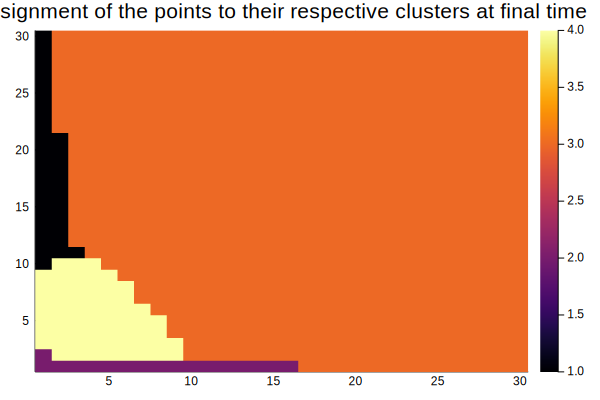

In [8]:
cl = map(i->i[2], argmax(ass, dims=2))
cl = reshape(cl, 30,30)
heatmap(cl, title="assignment of the points to their respective clusters at final time")

In [9]:
using Interact
@manipulate for cluster = slider(1:ncl, value=clmax)
@gif for i=0:length(dt)-1
    heatmap(reshape(cs[(1:900).+900*(i),:] * ass[:,cluster], 30, 30), title="density of cluster cl=$cluster at t=$i", clims=(0,1))
    end
end

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-3482284861761610857\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-18411555061320151882\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-3482284861761610857\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

┌ Info: Saved animation to 
│   fn = /Users/alex/Desktop/code/generators/tmp.gif
└ @ Plots /Users/alex/.julia/packages/Plots/RsO3g/src/animation.jl:98


Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 4,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
3, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/alex/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/alex/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/alex/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/Users/alex/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/Users/alex/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000012bbf2f50, Task (runnable) @0x000000012bbf2f50), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"18227650645376532265\",\"id\":\"ob_02\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"18227650645376532265\",\"id\":\"ob_01\",\"type

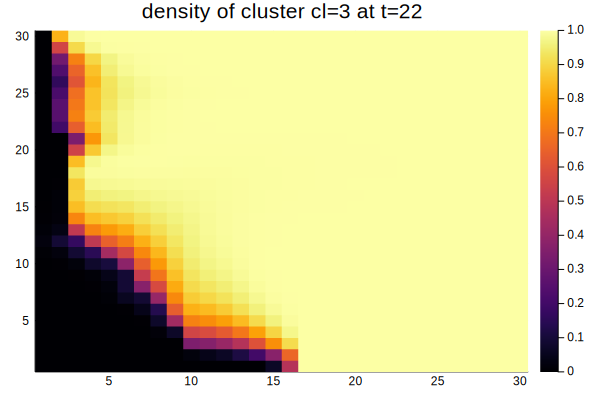

In [10]:
let i = 22
heatmap(reshape(cs[(1:900).+900*(i),:] * ass[:,clmax], 30, 30), title="density of cluster cl=$clmax at t=$i", clims=(0,1))
end